"""
Created on Fri Sep 16 17:52:25 2022
@author: fcosta
"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

# __Analytical view of correlated measurements.__
## Combined uncertainty in simple operations. Addition and subtraction.
When two input quantities are correlated, this correlation must be taken into account when estimating the combined uncertainty. 

This exercise aims to evaluate the effect of the correlation between two input quantities on their combined uncertainty. The measurand of interest is the distance of a string. To obtain the input quantities, or distances, we make use of two rulers. The fact that these two rulers were probably calibrated according to similar standards and operations, and scaled with comparable accuracy might make these measurements correlated.   
We take N measurements with each ruler and obtain a mean value (L1_mean, L2_mean). The error in the measurement (U_ruler1, U_ruler2) is the standard deviation of the N measurements, and is associated with the shortest distance measurable by each ruler, with a coverage factor k.

### Input quantities 

In [2]:
# N° of points for the montecarlo simulation
N=10000

# Expected values of the measurand estimated using ruler1 and ruler2.
L1_mean = 1.89 # expected value L1 [m]
L2_mean = 2.9 # Expected value L2 [m]

### Rulers' uncertainties and correlation coefficient

In [3]:
U_ruler1 = .01  # uncertainty ruler1 [m] (stdv)
U_ruler2 = .05  # uncertainty ruler2 [m] (stdv)
L_corr_n = 0    # degree of correlation between L1 and L2: [-1,1] --> 0:uncorrelated; -1,1:fully negatively/positively correlated
k        = 3    # coverage factor 
n_dec    = 3    # N° of decimals in the results

### Random distributions

In [4]:
Distributions=pd.DataFrame({'L1':np.random.normal(L1_mean,U_ruler1,N),'L2':np.random.normal(L2_mean,U_ruler2,N)})

In [5]:
Distributions

,L1,L2
0,1.906312,2.898203
1,1.890587,2.901600
2,1.863979,2.857300
3,1.880090,2.896353
4,1.902171,2.876198
...,...,...
9995,1.895139,2.894049
9996,1.894104,2.939025
9997,1.904025,2.910528
9998,1.894724,2.915498


## Correlated distributions for L1 and L2

 We create the correlated data for L1 and L2

In [6]:
L_means = [Distributions['L1'].mean(), Distributions['L2'].mean()]  
L_stds  = [Distributions['L1'].std(), Distributions['L2'].std()]

# Covariance matrix
L_covs = [[L_stds[0]**2          , L_stds[0]*L_stds[1]*L_corr_n], 
          [L_stds[0]*L_stds[1]*L_corr_n,           L_stds[1]**2]]

# Correlated distributions of L1 and L2
L_corr = np.random.default_rng().multivariate_normal(L_means, L_covs, N).T 

# Correlated distributions data frame
Correlated_Distributions=pd.DataFrame({'L_corr1':L_corr[0], 'L_corr2':L_corr[1]})
Correlated_Distributions

,L_corr1,L_corr2
0,1.868987,2.873685
1,1.882650,2.975330
2,1.904314,2.931096
3,1.889256,2.884859
4,1.881753,2.917484
...,...,...
9995,1.892628,2.968222
9996,1.885638,2.899338
9997,1.888969,2.967168
9998,1.878553,2.793315


In [7]:
# Covariance (L1, L2) and correlation coefficients as defined in GUM:
L_covariance = (1/(N-1))*sum((L_corr[0]-L_means[0])*(L_corr[1]-L_means[1]))
C_L = L_covariance/(L_stds[0]*L_stds[1]) # Correlation coefficients

# Correlation coefficients    
C_L0=np.corrcoef(L_corr[0], L_corr[1])
C_L1=C_L0[0][1]
print('Correlation coefficient: ',  C_L0,';\nL_COVS: ',L_covs,';\nL_CORR: ',L_corr,';\nL_covariance: ',L_covariance)

Correlation coefficient:  [[ 1.        -0.0031014]
 [-0.0031014  1.       ]] ;
L_COVS:  [[9.979660083303871e-05, 0.0], [0.0, 0.002513081977067385]] ;
L_CORR:  [[1.8689867  1.88264978 1.90431358 ... 1.88896894 1.87855299 1.8798138 ]
 [2.8736849  2.97533007 2.93109606 ... 2.96716839 2.7933148  2.9084753 ]] ;
L_covariance:  -1.529885007192904e-06


## Montecarlo Uncertainty Method
### Addition and subtraction of **uncorrelated** distributions
If we use different rulers to measure either string our operations will contain correlated terms when calculating the uncertainty that we need to account for.
First we add and substract the uncorrelated distributions ("Distributions")


In [8]:
L_sum_Uncorr   = Distributions['L1']+Distributions['L2']  # Sum of uncorrelated distributions
L_subs_Uncorr  = Distributions['L1']-Distributions['L2'] # Subtraction of uncorrelated distributions

### Uncertainty uncorrelated quantities

In [9]:
U_Uncorr_sum_MC   = np.std(L_sum_Uncorr)     # Uncertainty of the sum of uncorrelated distributions
U_Uncorr_subs_MC = np.std(L_subs_Uncorr)   # Uncertainty of the subtraction of uncorrelated distributions 

### Addition and subtraction of **correlated** distributions
If we use different rulers to measure either string our operations will contain correlated terms when calculating the uncertainty that we need to account for. Then, now we add/substract the correlated distributions (Correlated_Distributions)


In [10]:
L_sum_Corr     = Correlated_Distributions['L_corr1']+Correlated_Distributions['L_corr2']  # Sum of correlated distributions
L_subs_Corr    = Correlated_Distributions['L_corr1']-Correlated_Distributions['L_corr2']  # Subtraction of correlated distributions

### Uncertainty correlated quantities

In [11]:
U_Corr_sum_MC   = np.std(L_sum_Corr)    # Uncertainty of the addition of correlated distributions
U_Corr_subs_MC  = np.std(L_subs_Corr)   # Uncertainty of the subtraction of correlated distributions

# GUM uncertainty method

### Uncertainties in addition and subtraction operations when using **uncorrelated** measurements

In [12]:
# Uncorrelated quantities
U_Uncorr_sum_GUM = np.sqrt(U_ruler1**2+U_ruler2**2) 
# Correlated quantities
U_Uncorr_subs_GUM = np.sqrt(U_ruler1**2+U_ruler2**2)

### Uncertainties in addition and subtraction operations when using **correlated** measurements

In [13]:
U_Corr_sum_GUM   = np.sqrt(U_ruler1**2+U_ruler2**2+2*U_ruler1*U_ruler2*C_L)
U_Corr_subs_GUM  = np.sqrt(np.abs(U_ruler1**2+U_ruler2**2-2*U_ruler1*U_ruler2*C_L))

## Relative uncertainties of the correlated quantities

In [14]:
Urel_sum_GUM = 100*(U_Corr_sum_GUM)/(L1_mean+L2_mean)
Urel_sum_MC = 100*(U_Corr_sum_MC)/(L_sum_Corr.mean())

Urel_subs_GUM = 100*(U_Corr_subs_GUM)/abs(L1_mean-L2_mean)
Urel_subs_MC = 100*(U_Corr_subs_MC)/abs(L_subs_Corr.mean())

In [15]:
## Store results
Uncertainties=pd.DataFrame({'Uncorrelated': {'SUM': {'GUM': U_Uncorr_sum_GUM, 'MC': U_Uncorr_sum_MC}, 'Subtraction': {'GUM': U_Uncorr_subs_GUM, 'MC': U_Uncorr_subs_MC}}, 
                 'Correlated':{'SUM': {'GUM': U_Corr_sum_GUM,   'MC': U_Corr_sum_MC},   'Subtraction': {'GUM': U_Corr_subs_GUM,   'MC': U_Corr_subs_MC}}})

# Results

## Uncorrelated uncertainties

In [16]:
print('Uncertainty of the uncorrelated sum (GUM):          ', k*round(Uncertainties['Uncorrelated']['SUM']['GUM'],n_dec) ,'m')
print('Uncertainty of the uncorrelated sum (MC):           ', k*round(Uncertainties['Uncorrelated']['SUM']['MC'],n_dec) ,'m'+'\n')
print('Uncertainty of the uncorrelated subtraction (GUM): ', k*round(Uncertainties['Uncorrelated']['Subtraction']['GUM'],n_dec) ,'m')
print('Uncertainty of the uncorrelated subtraction (MC):  ', k*round(Uncertainties['Uncorrelated']['Subtraction']['MC'],n_dec) ,'m')


Uncertainty of the uncorrelated sum (GUM):           0.153 m
Uncertainty of the uncorrelated sum (MC):            0.153 m

Uncertainty of the uncorrelated subtraction (GUM):  0.153 m
Uncertainty of the uncorrelated subtraction (MC):   0.153 m


## Correlated uncertainties

In [17]:
print ('N° of samples: '+str(N))
print('Coverage factor(k) = ' +str(k)+'\n')
print('Uncertainty of the correlated sum (GUM):                     ', k*round(Uncertainties['Correlated']['SUM']['GUM'],n_dec) ,'m')
print('Relative uncertainty of the correlated sum (GUM):            ', k*round(Urel_sum_GUM,n_dec) ,'%'+'\n')

print('Uncertainty of the correlated sum (MC):                      ', k*round(Uncertainties['Correlated']['SUM']['MC'],n_dec) ,'m')
print('Relative uncertainty of the correlated sum (MC):             ',k* round(Urel_sum_MC,n_dec) ,'%'+'\n')

print('Uncertainty of the correlated subtraction (GUM):            ', k*round(Uncertainties['Correlated']['Subtraction']['GUM'],n_dec) ,'m')
print('Relative uncertainty of the correlated subtraction (GUM):   ', k*round(Urel_subs_GUM,n_dec) ,'%'+'\n')

print('Uncertainty of the correlated subtraction (MC):             ', k*round(Uncertainties['Correlated']['Subtraction']['MC'],n_dec) ,'m')
print('Relative uncertainty of the correlated subtraction (MC):    ', k*round(Urel_subs_MC,n_dec) ,'%')


N° of samples: 10000
Coverage factor(k) = 3

Uncertainty of the correlated sum (GUM):                      0.153 m
Relative uncertainty of the correlated sum (GUM):             3.192 %

Uncertainty of the correlated sum (MC):                       0.153 m
Relative uncertainty of the correlated sum (MC):              3.1740000000000004 %

Uncertainty of the correlated subtraction (GUM):             0.153 m
Relative uncertainty of the correlated subtraction (GUM):    15.153 %

Uncertainty of the correlated subtraction (MC):              0.153 m
Relative uncertainty of the correlated subtraction (MC):     15.059999999999999 %


## Plot results

Text(0.5, 1.0, 'Correlated series for L -- C=0; N=10000')

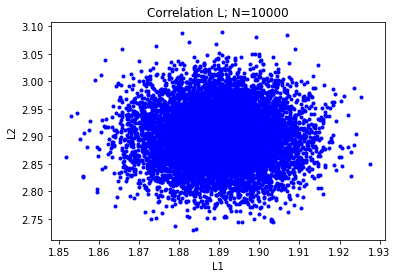

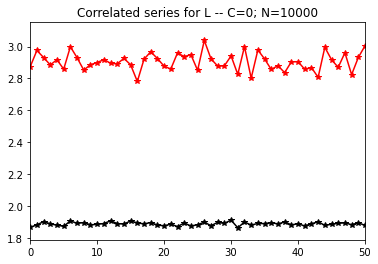

In [18]:
fig0,ax0=plt.subplots()
ax0.scatter(L_corr[0], L_corr[1],c='b',marker='.')
ax0.set_title('Correlation L'+ '; N='+str(N))
ax0.set_xlabel('L1')
ax0.set_ylabel('L2')

fig1,ax1=plt.subplots()
ax1.set_xlim(0,50)
ax1.plot(L_corr[0],'-k', L_corr[1],'-r',marker='*')
ax1.set_title('Correlated series for L -- C=' + str(L_corr_n)+ '; N='+str(N))
